## Decision Tree Classifier & Regressor - Wine Quality 

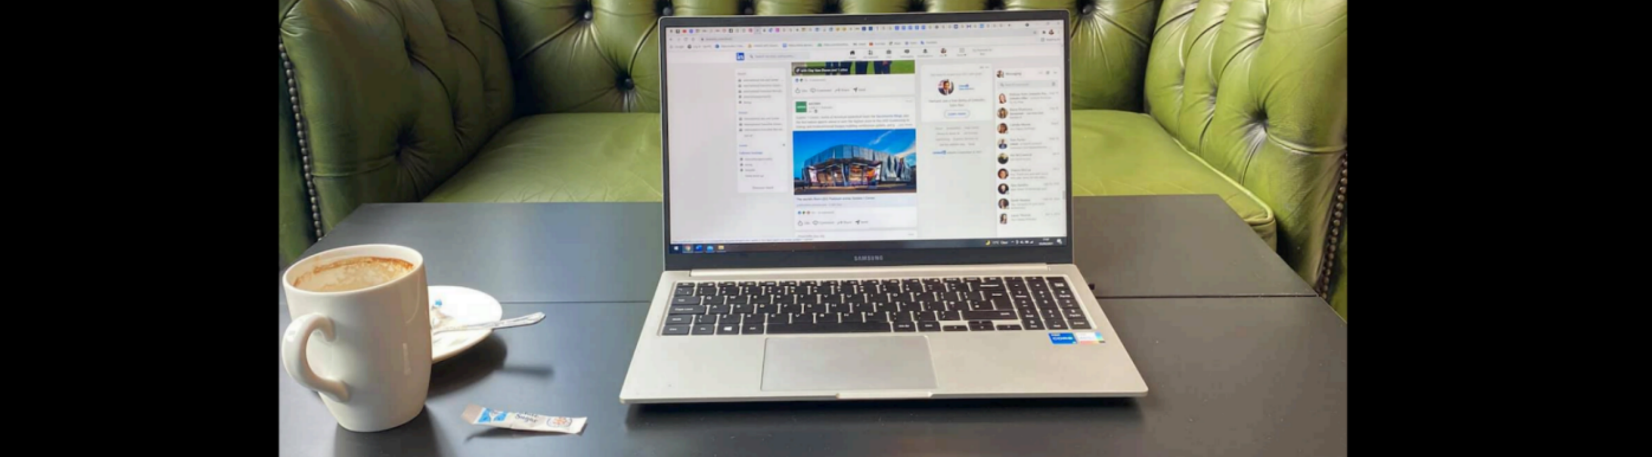

### Hemant Thapa

#### Loading Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import mean_squared_error

In [3]:
#class to calculate metrics
class EvaluationMetrics:
    def __init__(self, y_true, y_predicted):
        self.y_true = y_true
        self.y_predicted = y_predicted
    #method to fit all metrics
    def fit(self):
        #declaring dictonary to store all metrics
        result = {}
        #accuracy 
        result['accuracy'] = accuracy_score(self.y_true, self.y_predicted)
        precision, recall, f_beta, i = precision_recall_fscore_support(self.y_true, self.y_predicted, average='binary')
        #recall
        result['recall'] = recall
        #precision
        result['precision'] = precision
        #f1 score
        result['f1 score'] = f_beta
        return result

In [4]:
#class to perform decision plot
class DecisionPlot:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
    #method to plot
    def plot(self):
        plt.subplots(figsize=(25, 20))
        #selecting model and features_names
        tree.plot_tree(self.model, feature_names=self.feature_names, filled=True)
        plt.show()

#### loading DataSet 

In [5]:
#loading tumor dataset
df = pd.read_csv('wine_quality.csv')

In [6]:
df[:5]

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
#removing unncessary columns
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Pre Processing 

In [9]:
#checking shape of data
df.shape

(6497, 13)

In [10]:
#total size of data
df.size

84461

In [11]:
#data types
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

- `fixed_acidity`: This column likely represents the fixed acidity level of some substances, possibly in a chemical context.

- `volatile_acidity`: This column likely represents the level of volatile acidity in a substance. Volatile acidity is a measure of the amount of volatile acids in a solution, often found in the context of wines.

- `citric_acid`: This column likely represents the citric acid content in a substance. Citric acid is a weak organic acid commonly found in citrus fruits.

- `residual_sugar`: This column probably represents the amount of residual sugar in a solution or substance, such as in the case of wines.

- `chlorides`: This column might represent the concentration of chloride ions in a solution, which is often a measure of salinity or saltiness.

- `free_sulfur_dioxide`: This column may represent the concentration of free sulfur dioxide in a substance. Sulfur dioxide is a chemical compound used as a preservative in various applications, including winemaking.

- `total_sulfur_dioxide`: This column likely represents the total concentration of sulfur dioxide in a substance, which includes both free and bound forms.

- `density`: This column probably represents the density of a substance. Density is a measure of mass per unit volume.

- `pH`: This column represents the pH level of a solution, which is a measure of its acidity or alkalinity.

- `sulphates`: This column may represent the concentration of sulfate ions in a solution or substance.

- `alcohol`: This column likely represents the alcohol content of a beverage, such as wine or another alcoholic drink.

- `quality`: This column appears to represent a quality rating or score associated with the dataset. It's an integer value that may indicate the quality of a product, with higher values possibly indicating better quality.

- `color`: This column is of type `object`, which suggests it contains categorical data representing the color of something. For example, in the context of wine, it could indicate whether the wine is red, white, or some other color.


In [12]:
#information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
#checking missing values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [14]:
#converting columns to smaller case
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

#### Exploratory Data Analysis

In [16]:
#summary statistics for numerical columns
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- **Column Names**: These are the names of the dataset's attributes (or features). They include `fixed_acidity`, `volatile_acidity`, `citric_acid`, `residual_sugar`, `chlorides`, `free_sulfur_dioxide`, `total_sulfur_dioxide`, `density`, `pH`, `sulphates`, `alcohol`, and `quality`.

- **count**: This row provides the count of non-null values for each attribute. It tells you how many data points (rows) in the dataset have valid (non-null) values for that attribute. For example, there are 6,497 data points for all the attributes.

- **mean**: This row displays the mean (average) value for each attribute. It represents the central tendency of the data. For instance, the mean `fixed_acidity` is approximately 7.2153.

- **std**: This row shows the standard deviation, which measures the spread or dispersion of the data around the mean. It provides information about the variability in the data. For example, the standard deviation of `fixed_acidity` is approximately 1.2964.

- **min**: This row displays the minimum value observed for each attribute in the dataset. It represents the smallest value in the dataset for that attribute. For example, the minimum value of `fixed_acidity` is 3.8.

- **25%**: This row shows the 25th percentile or the first quartile. It indicates the value below which 25% of the data falls. In this context, it provides information about the lower range of the data distribution.

- **50%**: This row displays the median or 50th percentile. It represents the middle value in the dataset when it is sorted in ascending order. Half of the data falls below this value.

- **75%**: This row represents the 75th percentile or the third quartile. It indicates the value below which 75% of the data falls. It provides information about the upper range of the data distribution.

- **max**: This row shows the maximum value observed for each attribute in the dataset. It represents the largest value in the dataset for that attribute. For example, the maximum value of `fixed_acidity` is 15.9.


In [17]:
#count of unique values in the quality column
print(df['quality'].value_counts())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


- There are 2,836 rows in the DataFrame where quality is equal to 6.
- There are 2,138 rows where quality is equal to 5.
- There are 1,079 rows where quality is equal to 7.
- There are 216 rows where quality is equal to 4.
- There are 193 rows where quality is equal to 8.
- There are 30 rows where quality is equal to 3.
- There are 5 rows where quality is equal to 9.

In [18]:
#selecting numerical and non numerical dataframe
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_columns)

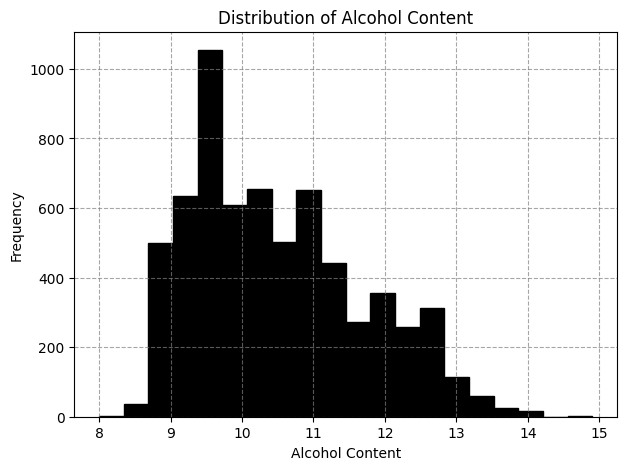

In [19]:
#Histogram of alcohol column
plt.figure(figsize=(7, 5))
plt.hist(df_numeric['alcohol'], bins=20, color='black', edgecolor='black')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='grey')  
plt.show()

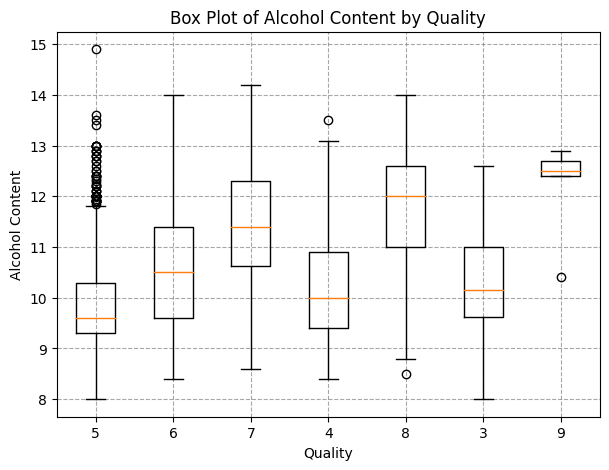

In [20]:
#box plot for quality vs alcohol
plt.figure(figsize=(7, 5))
plt.boxplot([df[df['quality'] == i]['alcohol'] for i in df['quality'].unique()], labels=df['quality'].unique())
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.title('Box Plot of Alcohol Content by Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='grey')  
plt.show()

In [21]:
#correlation matrix for numerical columns
correlation_matrix = df_numeric.corr()
correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


**Positive Correlation**: When the correlation coefficient is positive (closer to 1), it indicates a positive linear relationship between two variables. For example:

- `fixed_acidity` has a positive correlation of 0.458910 with `density`, suggesting that as the fixed acidity increases, the density tends to increase as well.
- `alcohol` has a positive correlation of 0.444319 with `quality`, indicating that higher alcohol content is associated with higher quality ratings.

**Negative Correlation**: When the correlation coefficient is negative (closer to -1), it indicates a negative linear relationship between two variables. For example:

- `density` has a negative correlation of -0.686745 with `alcohol`, suggesting that as density increases, alcohol content tends to decrease.
- `volatile_acidity` has a negative correlation of -0.377981 with `citric_acid`, indicating that higher volatile acidity is associated with lower citric acid content.

**Weak or No Correlation**: When the correlation coefficient is close to 0, it suggests a weak or no linear relationship between two variables. For example:

- `citric_acid` and `sulphates` have a correlation coefficient of 0.056197, indicating a weak positive correlation.
- `fixed_acidity` and `quality` have a correlation coefficient of -0.076743, indicating a weak negative correlation.


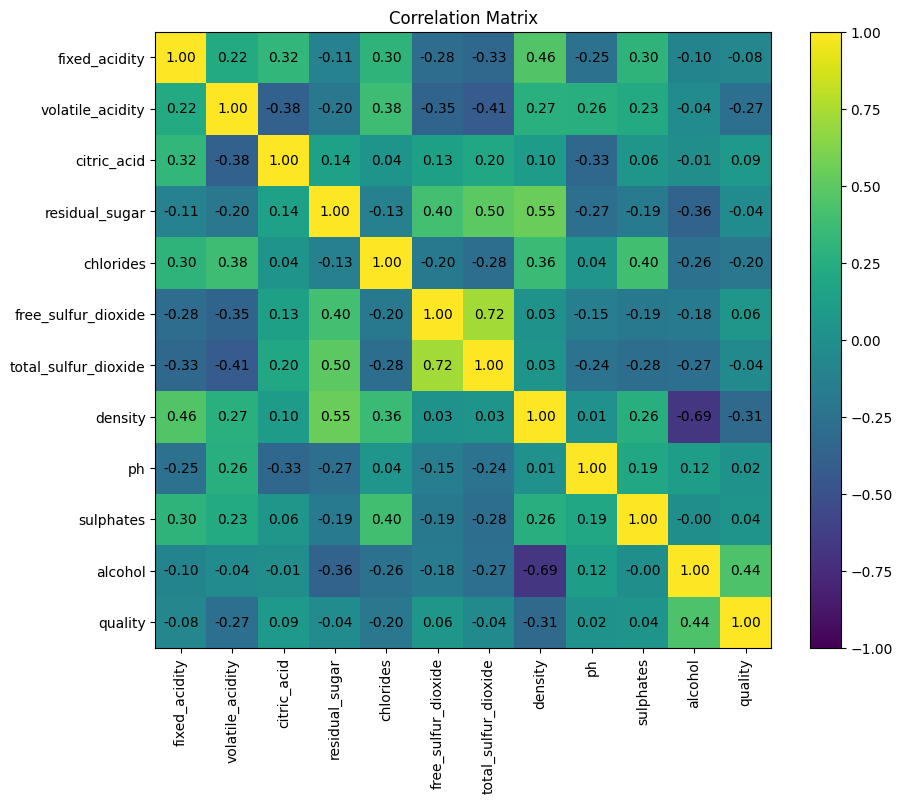

In [22]:
cmap = plt.get_cmap('viridis')
fig, ax = plt.subplots(figsize=(10, 8))
aspect_ratio = float(correlation_matrix.shape[0]) / correlation_matrix.shape[1]
#annotations
im = ax.imshow(correlation_matrix, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1, aspect=aspect_ratio)  # Adjust vmin and vmax for the color scale
#annotations for each cell
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.colorbar(im)
ax.set_xticks(range(len(correlation_matrix)))
ax.set_yticks(range(len(correlation_matrix)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

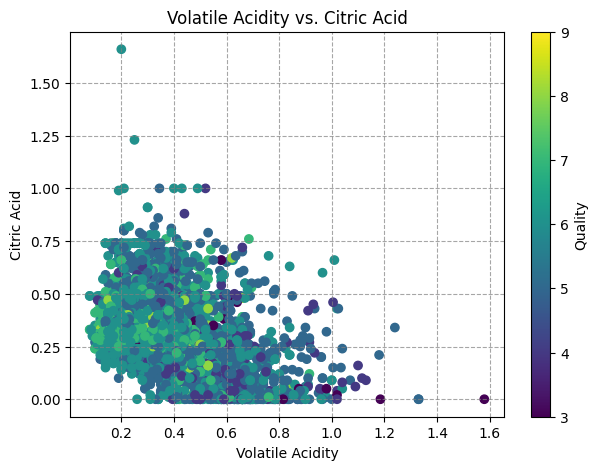

In [23]:
# Scatter plot between 'volatile_acidity' and 'citric_acid'
plt.figure(figsize=(7, 5))
plt.scatter(df['volatile_acidity'], df['citric_acid'], c=df['quality'], cmap='viridis')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.title('Volatile Acidity vs. Citric Acid')
plt.colorbar(label='Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='grey')  
plt.show()

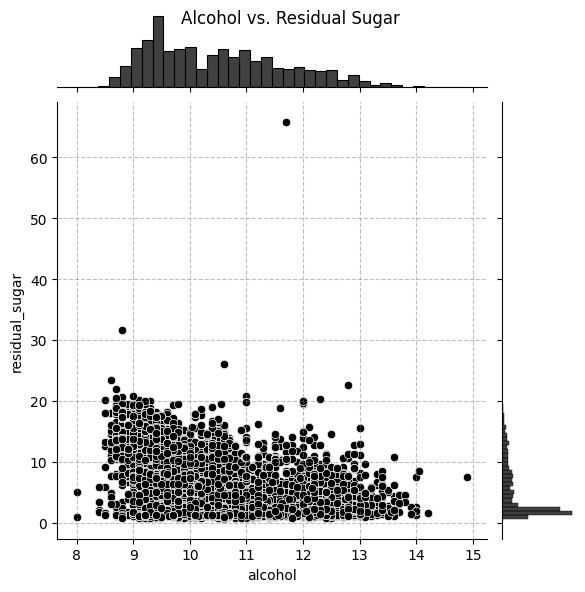

In [24]:
sns.jointplot(data=df, x='alcohol', y='residual_sugar', kind='scatter', color='black')
plt.suptitle('Alcohol vs. Residual Sugar')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='grey') 
plt.show()

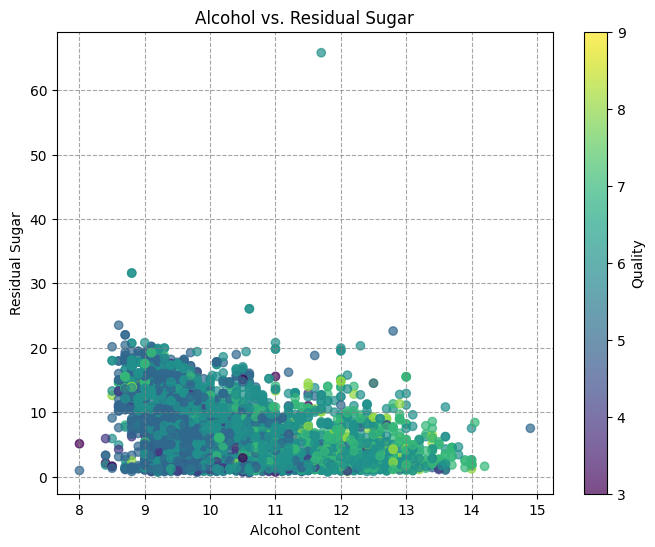

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['residual_sugar'], c=df['quality'], cmap='viridis', alpha=0.7)
plt.xlabel('Alcohol Content')
plt.ylabel('Residual Sugar')
plt.title('Alcohol vs. Residual Sugar')
plt.colorbar(label='Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='grey')  
plt.show()

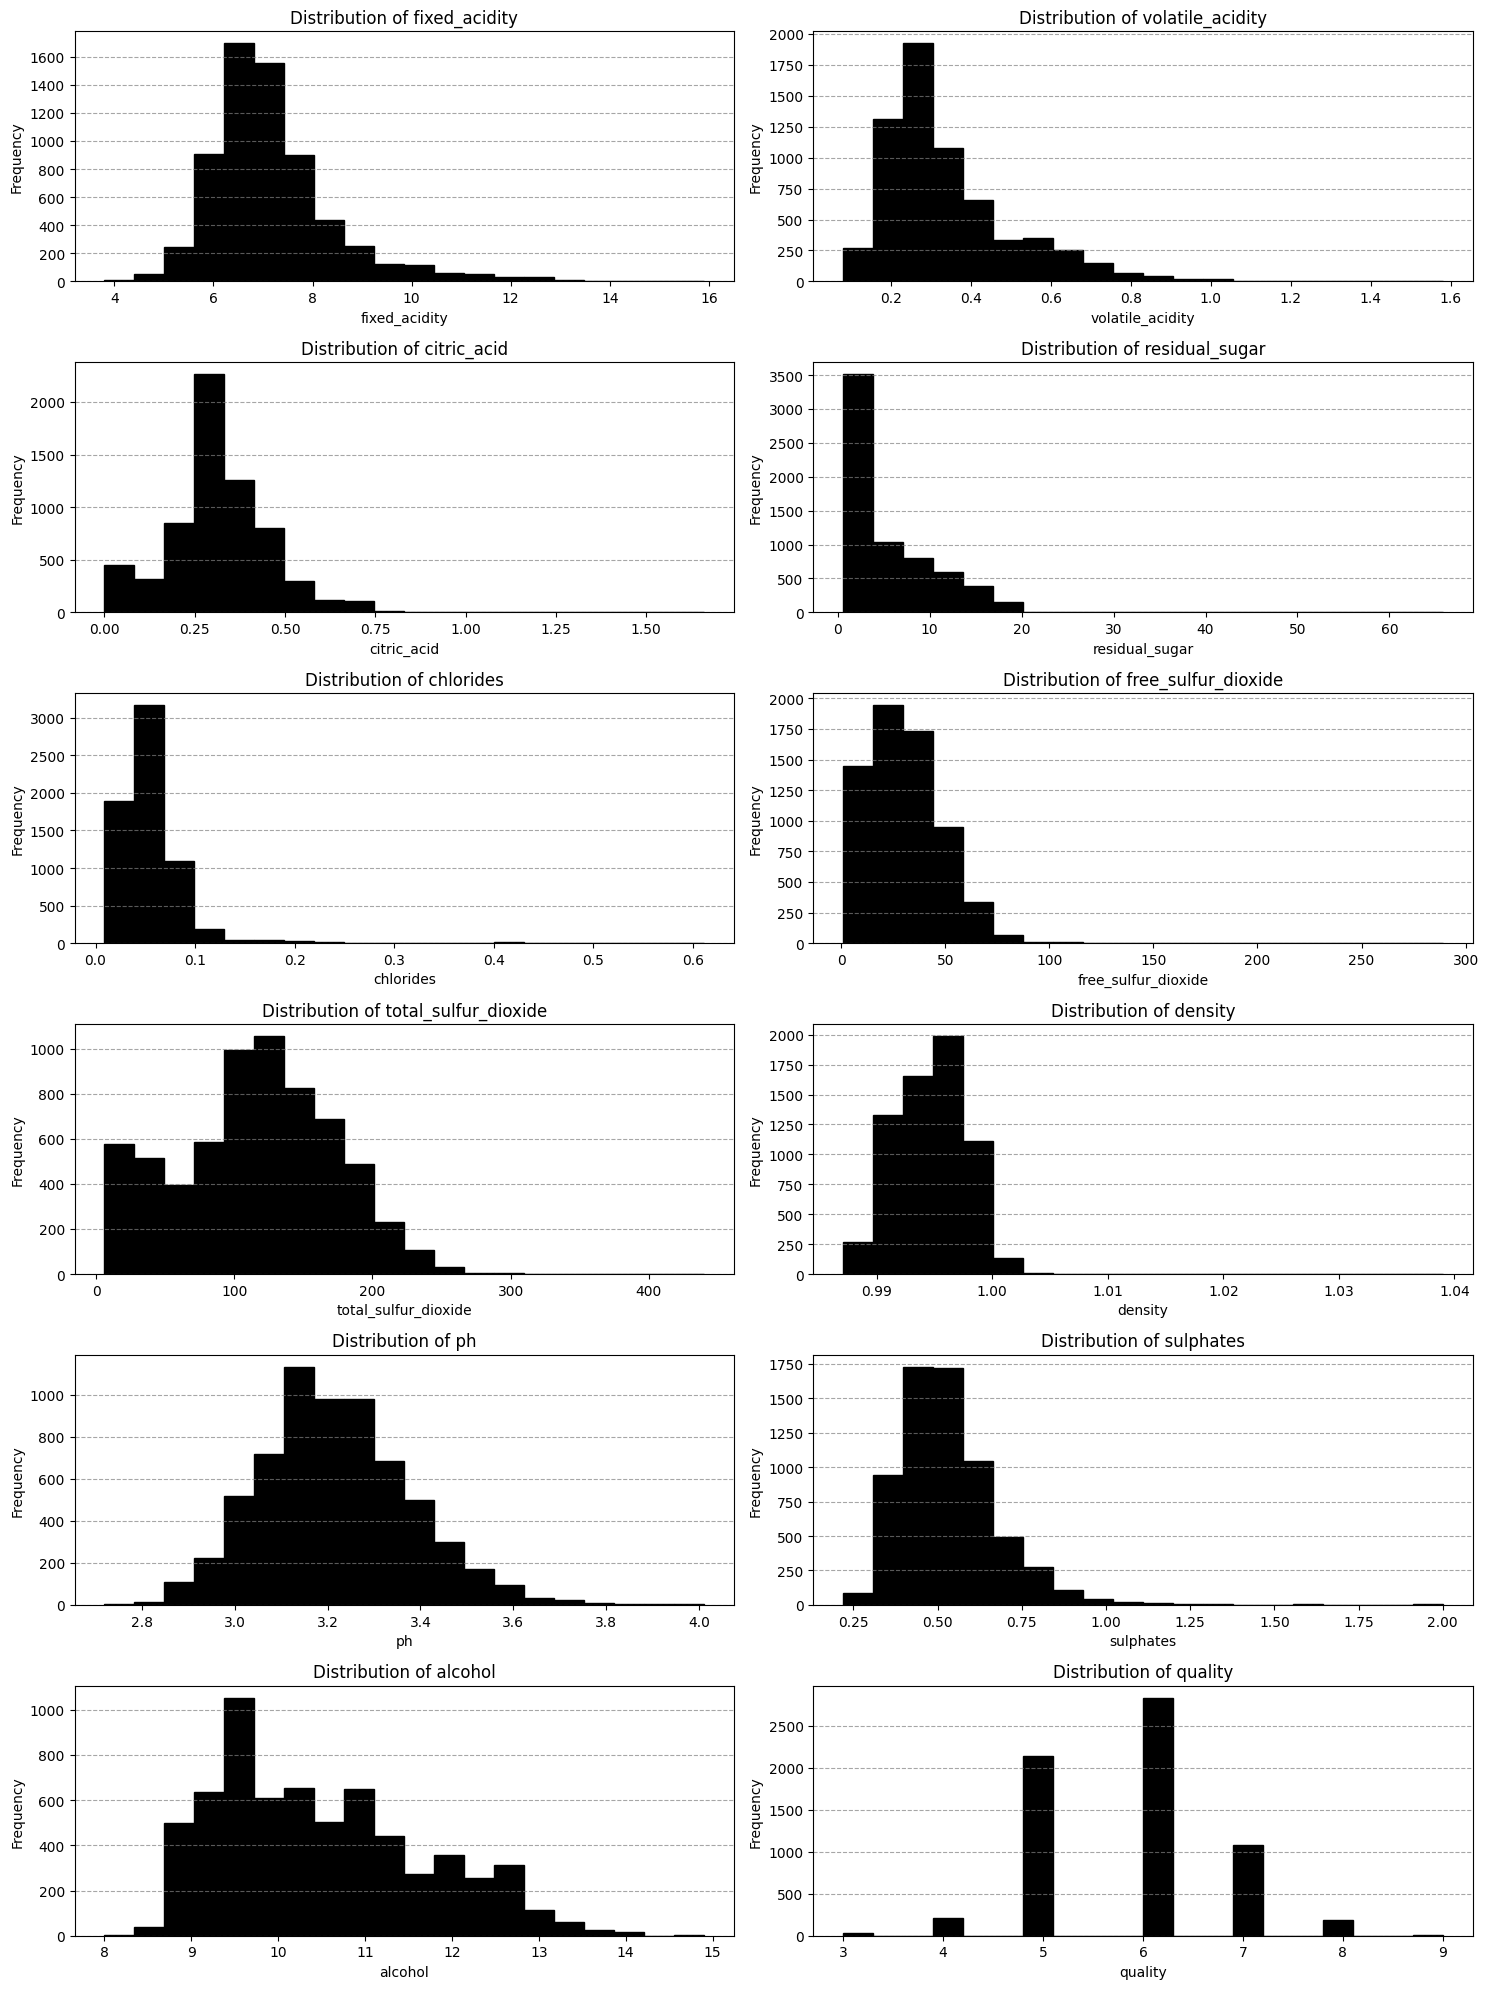

In [26]:
#subplots for each numeric column
num_columns = len(df_numeric.columns)
num_rows = (num_columns + 1) // 2  
#size of the overall figure
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 12))
#width and height
subplot_width, subplot_height = 15, 20
axes = axes.flatten()
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    ax.hist(df_numeric[column], bins=20, color='black', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
    ax.figure.set_size_inches(subplot_width, subplot_height)
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

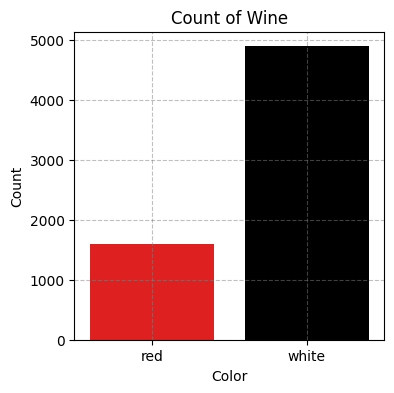

In [27]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='color', palette=['red', 'black'])
plt.title('Count of Wine')
plt.xlabel('Color')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='grey') 
plt.show()

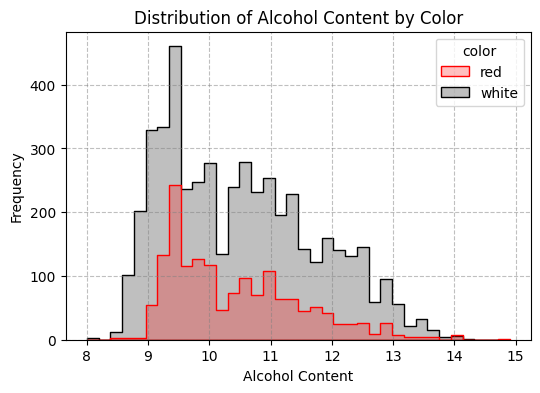

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='alcohol', hue='color', element='step', common_norm=False, palette=['red', 'black'])
plt.title('Distribution of Alcohol Content by Color')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='grey') 
plt.show()

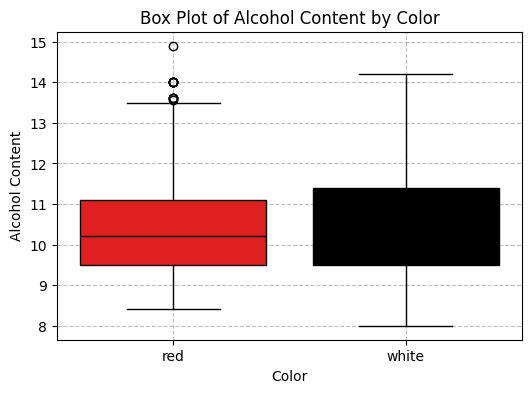

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='color', y='alcohol', palette=['red', 'black'])
plt.title('Box Plot of Alcohol Content by Color')
plt.xlabel('Color')
plt.ylabel('Alcohol Content')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.grid(axis='x', linestyle='--', alpha=0.5, color='grey') 
plt.show()

In [30]:
def scatter_plot(data, y_columns, color_column):
    cmap = plt.get_cmap('coolwarm', lut=len(data[color_column].unique()))
    colors = cmap(np.arange(len(data[color_column].unique())))
    
    num_columns = len(y_columns)
    num_rows = (num_columns + 1) // 2 
    subplot_width, subplot_height = 15, 20
    fig, axes = plt.subplots(num_rows, 2, figsize=(subplot_width, subplot_height))  
    axes = axes.flatten()

    for i, y_column in enumerate(y_columns):
        ax = axes[i]
        colors_for_scatter = data[color_column].map({value: color for value, color in zip(data[color_column].unique(), colors)})
        ax.scatter(data['residual_sugar'], data[y_column], alpha=0.6, edgecolors='k', c=colors_for_scatter, cmap='coolwarm')
        ax.set_title(f'Scatter Plot: Residual Sugar vs. {y_column}')
        ax.set_xlabel('Residual Sugar')
        ax.set_ylabel(y_column)
        ax.grid(True, ls='--', alpha=0.2, color='black')
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()


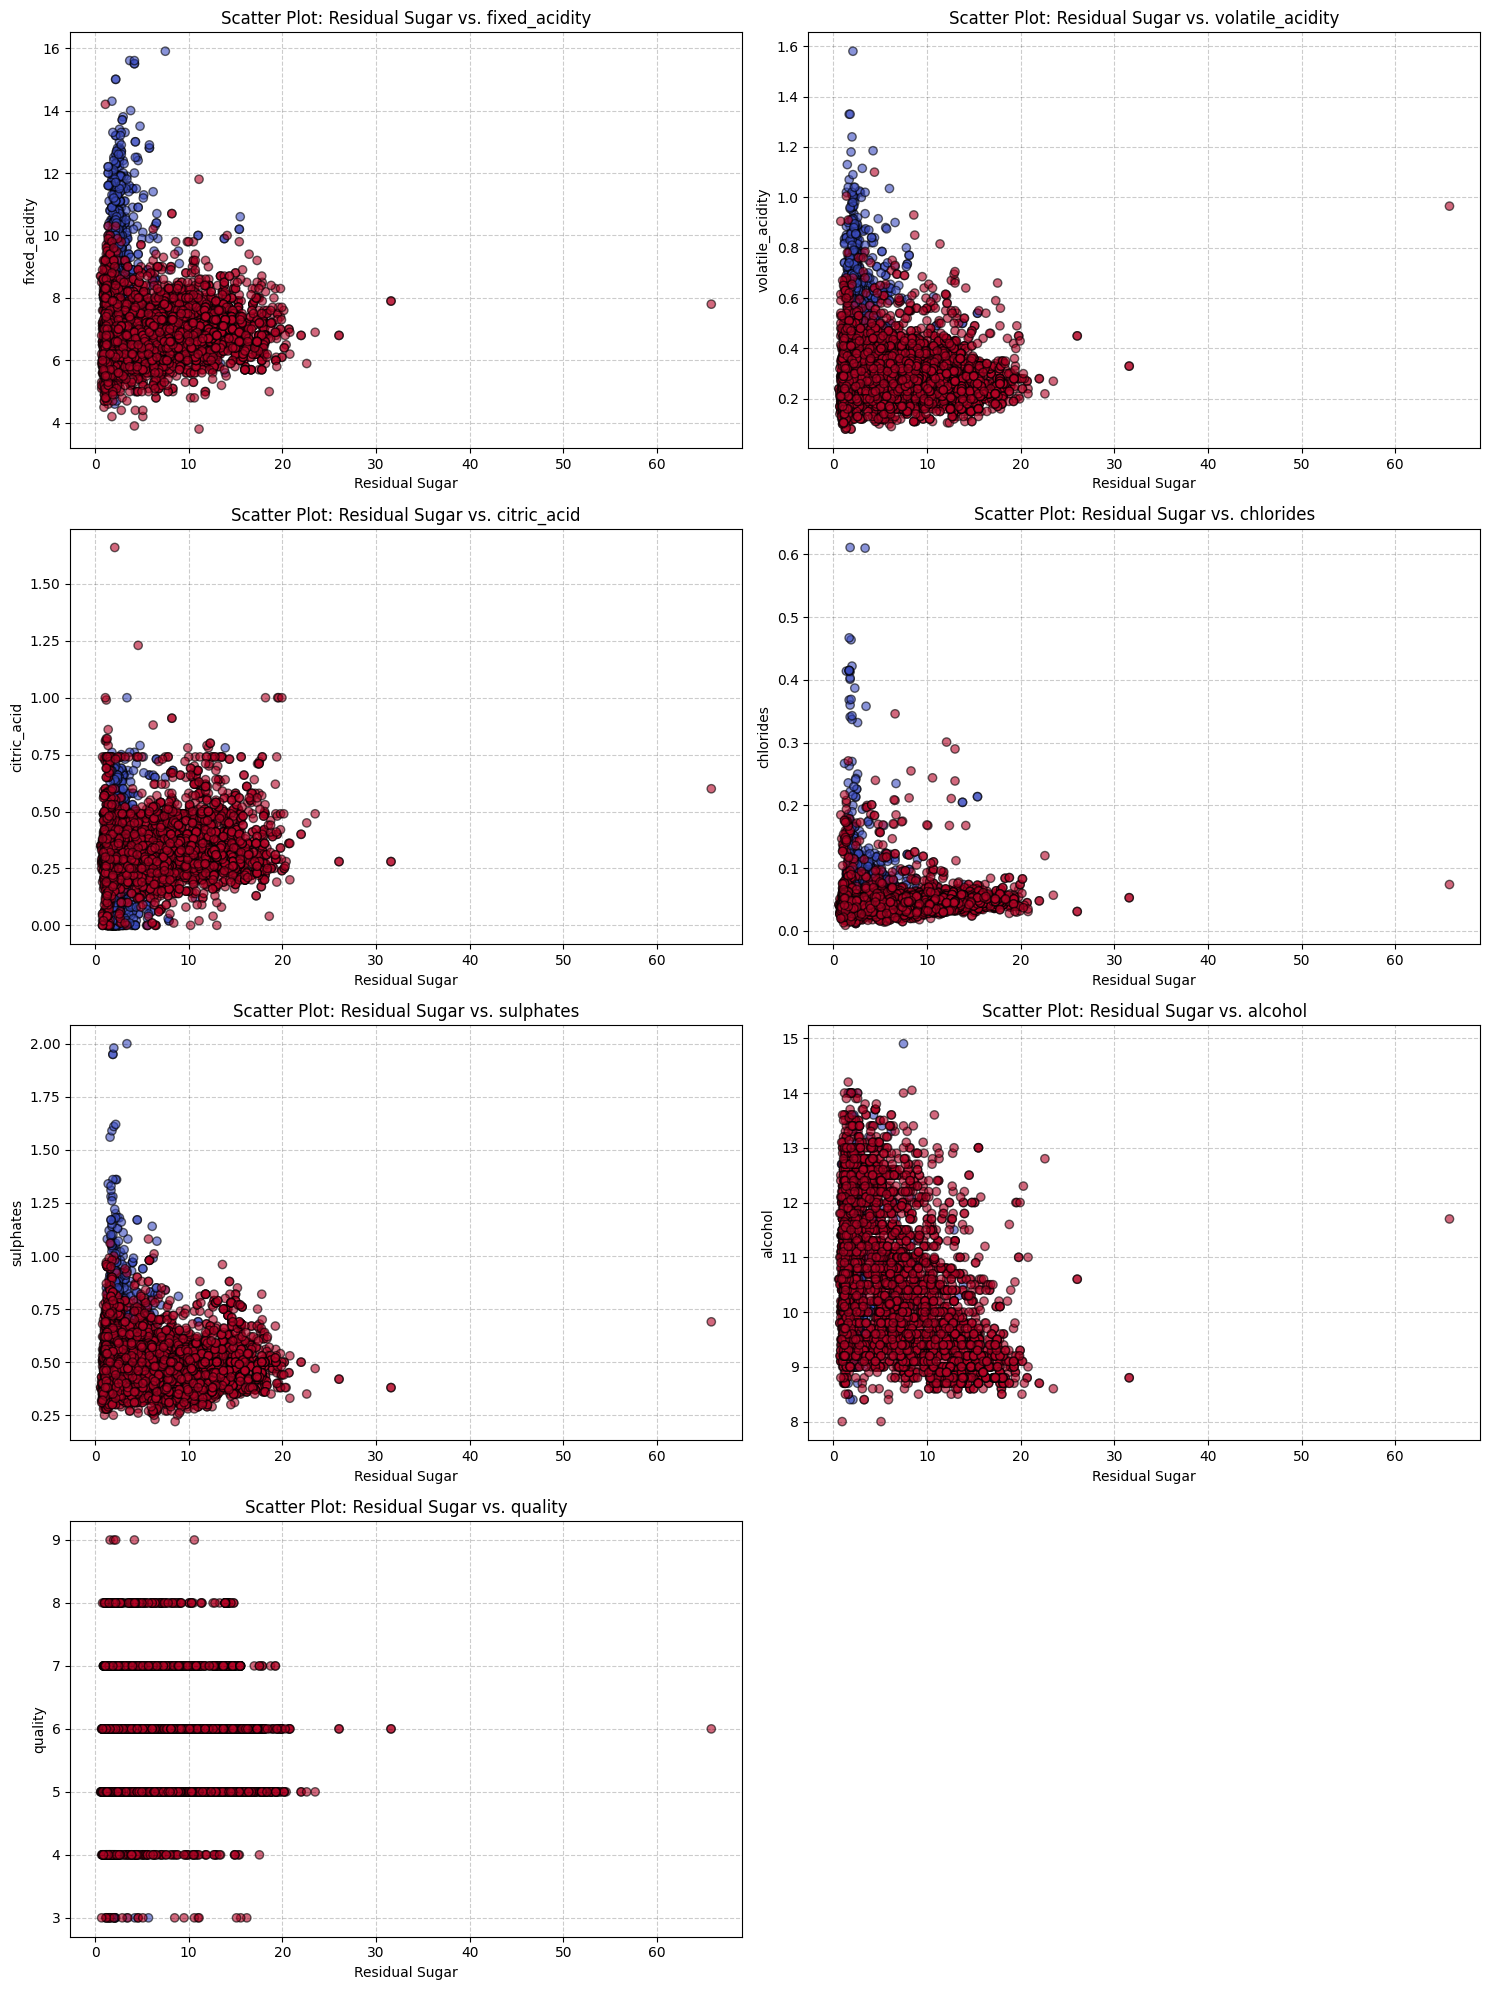

In [31]:
scatter_plot(df, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'sulphates', 'alcohol', 'quality'], 'color')

#### Feature Engineering 

In [32]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [33]:
df.color.unique()

array(['red', 'white'], dtype=object)

In [34]:
#replacing red with 0 and white with 1 
df['color'] = df['color'].replace({'red': 0, 'white': 1})

In [35]:
#selecting target
y = df.color.values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
#drop the color column to obtain the feature variables X
X = df.drop(columns=['color'])

In [37]:
#feature selection
X = X.iloc[:,:].values

In [38]:
X[:2]

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ],
       [ 7.8   ,  0.88  ,  0.    ,  2.6   ,  0.098 , 25.    , 67.    ,
         0.9968,  3.2   ,  0.68  ,  9.8   ,  5.    ]])

In [39]:
#splitting data into train and test
#80 percent training and 20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [40]:
X_train, X_test

(array([[ 5.  ,  0.61,  0.12, ...,  0.37, 13.5 ,  5.  ],
        [ 6.8 ,  0.28,  0.4 , ...,  0.5 ,  8.7 ,  5.  ],
        [ 5.7 ,  0.22,  0.2 , ...,  0.46,  8.9 ,  6.  ],
        ...,
        [ 6.8 ,  0.2 ,  0.59, ...,  0.38,  9.1 ,  6.  ],
        [ 6.6 ,  0.22,  0.37, ...,  0.55, 10.3 ,  7.  ],
        [ 8.7 ,  0.22,  0.42, ...,  0.43, 10.  ,  5.  ]]),
 array([[ 6.3 ,  0.18,  0.24, ...,  0.52,  9.2 ,  6.  ],
        [ 6.8 ,  0.14,  0.18, ...,  0.54, 11.2 ,  6.  ],
        [ 7.3 ,  0.22,  0.5 , ...,  0.66,  9.  ,  6.  ],
        ...,
        [ 6.1 ,  0.4 ,  0.16, ...,  0.74, 10.1 ,  7.  ],
        [ 6.1 ,  0.29,  0.27, ...,  0.51, 12.6 ,  7.  ],
        [ 7.2 ,  0.32,  0.33, ...,  0.51, 12.8 ,  7.  ]]))

#### Model Selection 

In [41]:
#classification through grid search
classification_model = DecisionTreeClassifier(random_state=42)

In [42]:
#defining parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 15, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

In [43]:
#performing grid search
grid_search = GridSearchCV(classification_model, param_grid, cv=5, scoring='f1', verbose=1)

In [44]:
#training model
print(grid_search.fit(X_train, y_train))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1', verbose=1)


In [45]:
#finding best parameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
#fitting best parameters and training model
classification_model = DecisionTreeClassifier(**best_params)
print(classification_model.fit(X_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [47]:
#performing predictions
preds = classification_model.predict(X_test)

#### Post Processing 

In [48]:
#evaluating overall best metrics
evaluation_report = EvaluationMetrics(y_test, preds).fit()
evaluation_report

{'accuracy': 0.9861538461538462,
 'recall': 0.9898887765419616,
 'precision': 0.9918946301925026,
 'f1 score': 0.9908906882591093}

In [49]:
#features name through iterating columns
feature_names = df[df.columns]

In [50]:
feature_names.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [51]:
#droping unncessary columns
feature_names.drop(columns='color', inplace=True)

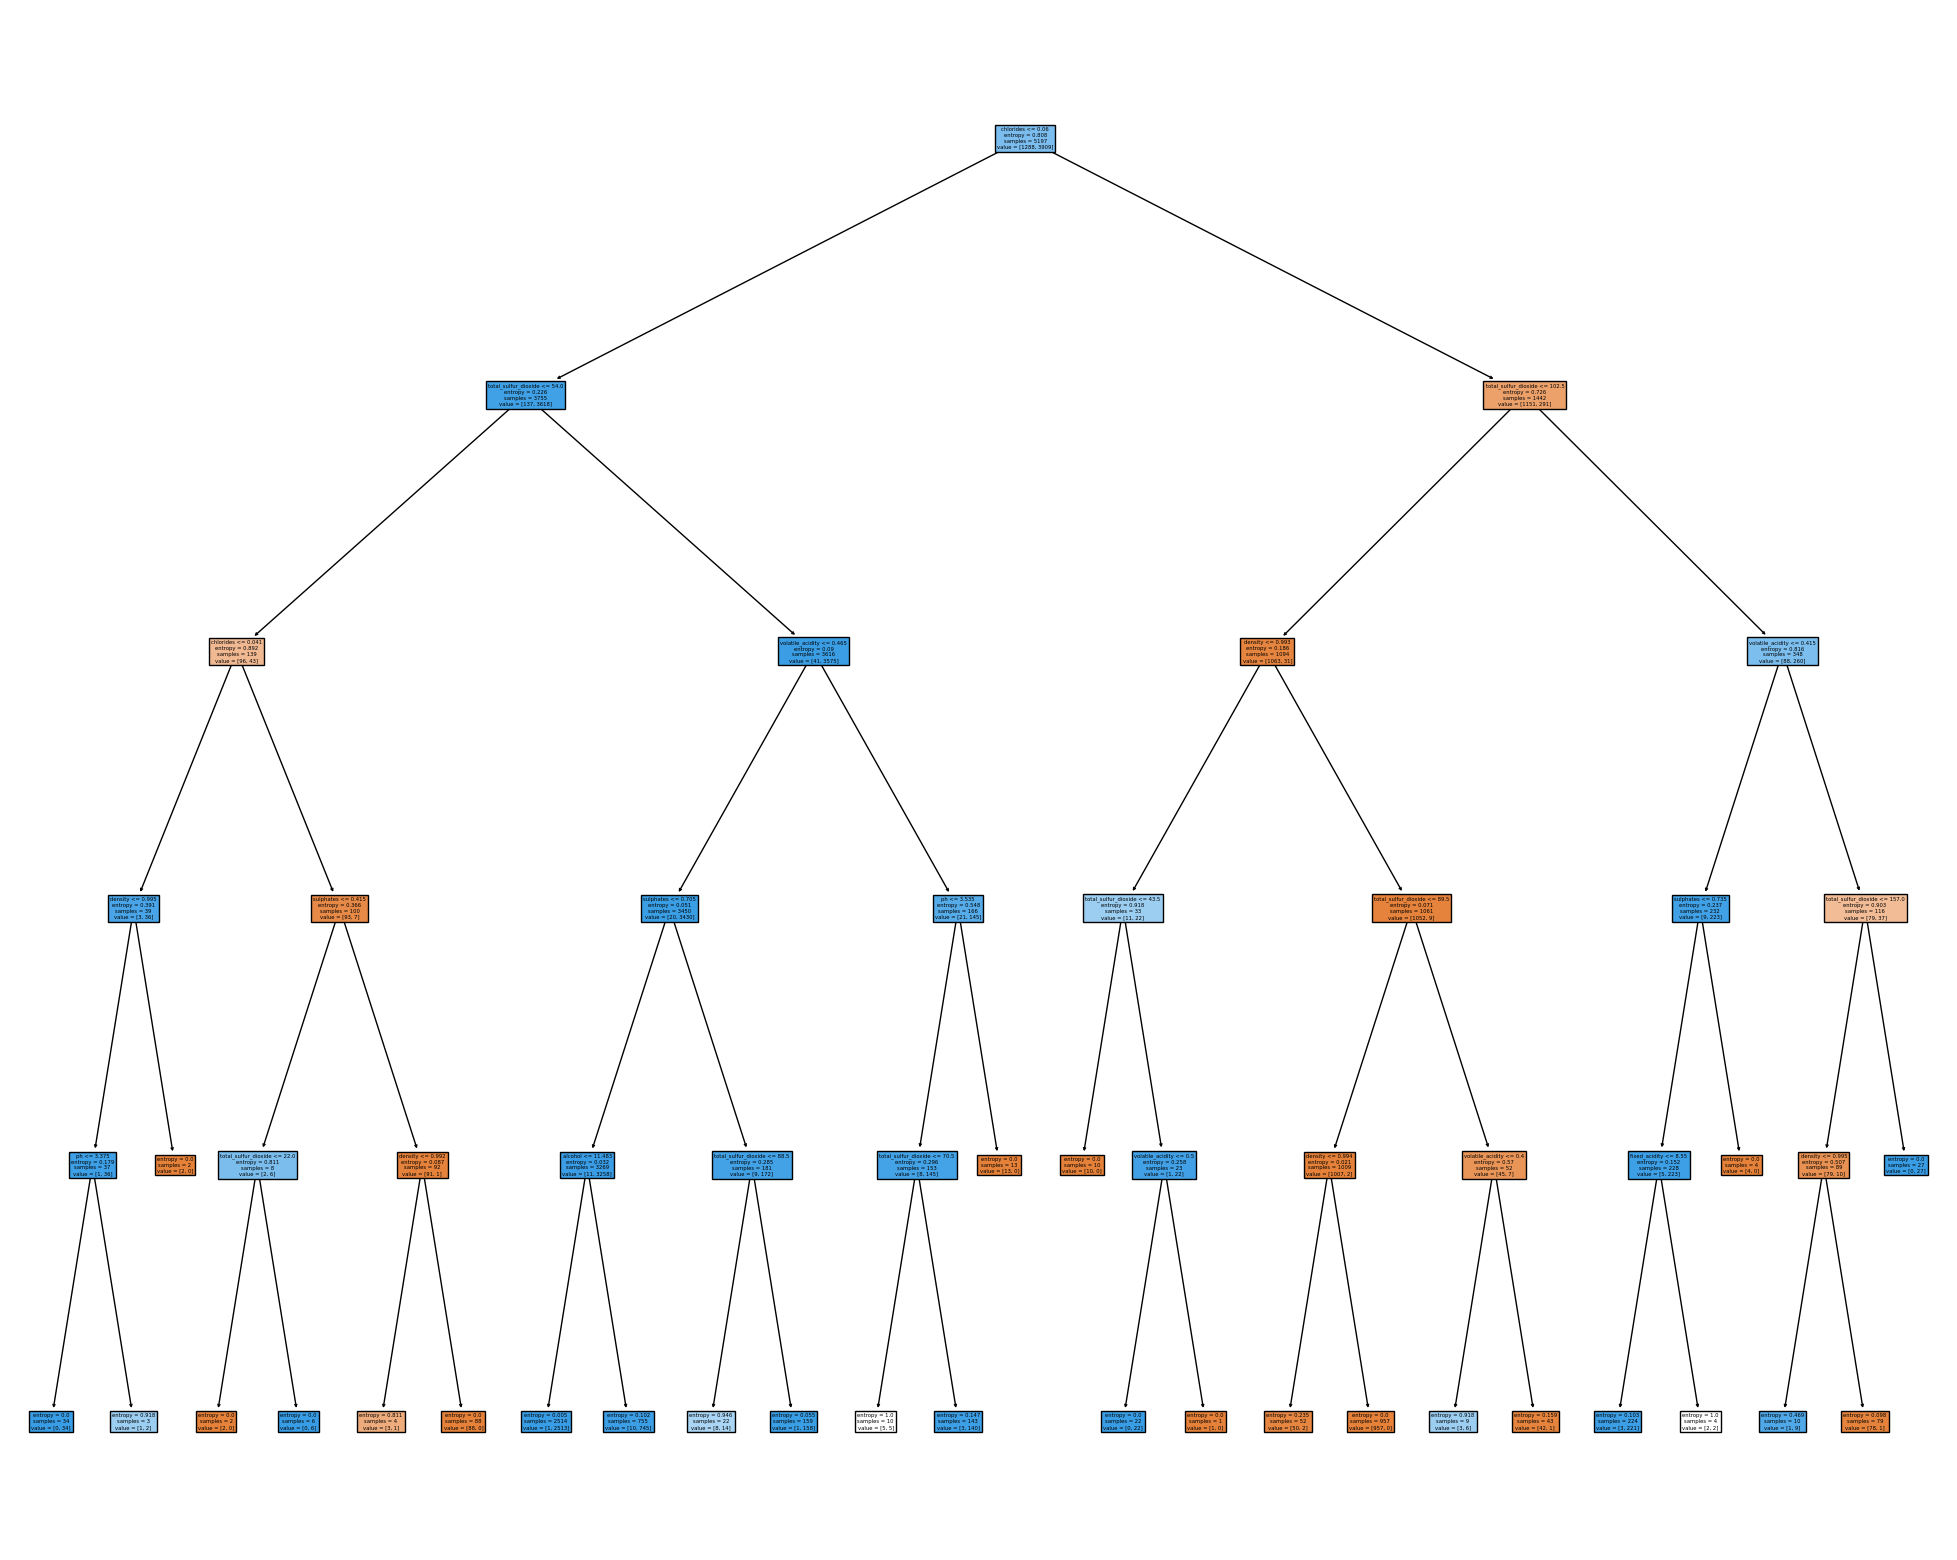

In [52]:
#fitting plot
plot_decision_tree = DecisionPlot(classification_model, feature_names=feature_names.columns.values).plot()

#### Feature Engineering for Decision Tree Classifier 

In [53]:
#target
y = df["residual_sugar"]

In [54]:
#features
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph',
       'sulphates', 'alcohol', 'quality']]

In [55]:
X[:5]

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
#splitting data into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [57]:
#creating object of Decision tree regressor
regressor_model = DecisionTreeRegressor(random_state=42)

In [58]:
#best serach paramaeters
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [59]:
#performing grid search
grid_search = GridSearchCV(regressor_model, param_grid, cv=5, verbose=1)

In [60]:
#prinitng all grids
print(grid_search.fit(X_train, y_train))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)


In [61]:
#finding best parameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [62]:
#best estimator's tree properties
best_tree_node_count = grid_search.best_estimator_.tree_.node_count
best_tree_max_depth = grid_search.best_estimator_.tree_.max_depth

In [63]:
#making prediction
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

In [64]:
#mean square error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [65]:
#print mean square error
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 0.645670605989145
Test MSE: 4.125376781021996


#### **References:**

1. [Scikit-Learn DecisionTree Documentation](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)
2. [DecisionTreeRegressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
